In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import * 

In [4]:
df = pd.read_csv("C:/Users/steven.luo/Documents/Machine Learning/Prophet Stock forecast/Prophet-Forecast/XGBoost stock predict/Naive and Prophet/TUP (2).csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-11,30.100000,30.670000,29.820000,30.520000,28.732052,864300
1,2018-10-12,31.000000,31.049999,29.830000,30.090000,28.327242,630300
2,2018-10-15,29.860001,31.490000,29.860001,31.090000,29.268660,462500
3,2018-10-16,31.360001,32.849998,30.920000,32.700001,30.784342,774800
4,2018-10-17,31.629999,32.459999,30.990000,32.049999,30.172419,613600
...,...,...,...,...,...,...,...
1251,2023-10-03,1.400000,1.410000,1.270000,1.310000,1.310000,1678300
1252,2023-10-04,1.350000,1.460000,1.250000,1.270000,1.270000,2960900
1253,2023-10-05,1.250000,1.320000,1.210000,1.260000,1.260000,1277800
1254,2023-10-06,1.270000,1.310000,1.230000,1.260000,1.260000,1032100


In [6]:
up_and_down=df['Close']-df['Open'] > 0
rate_of_return = (df['Close']-df['Open'])/df['Open']
up_and_down_statistic = up_and_down.value_counts()

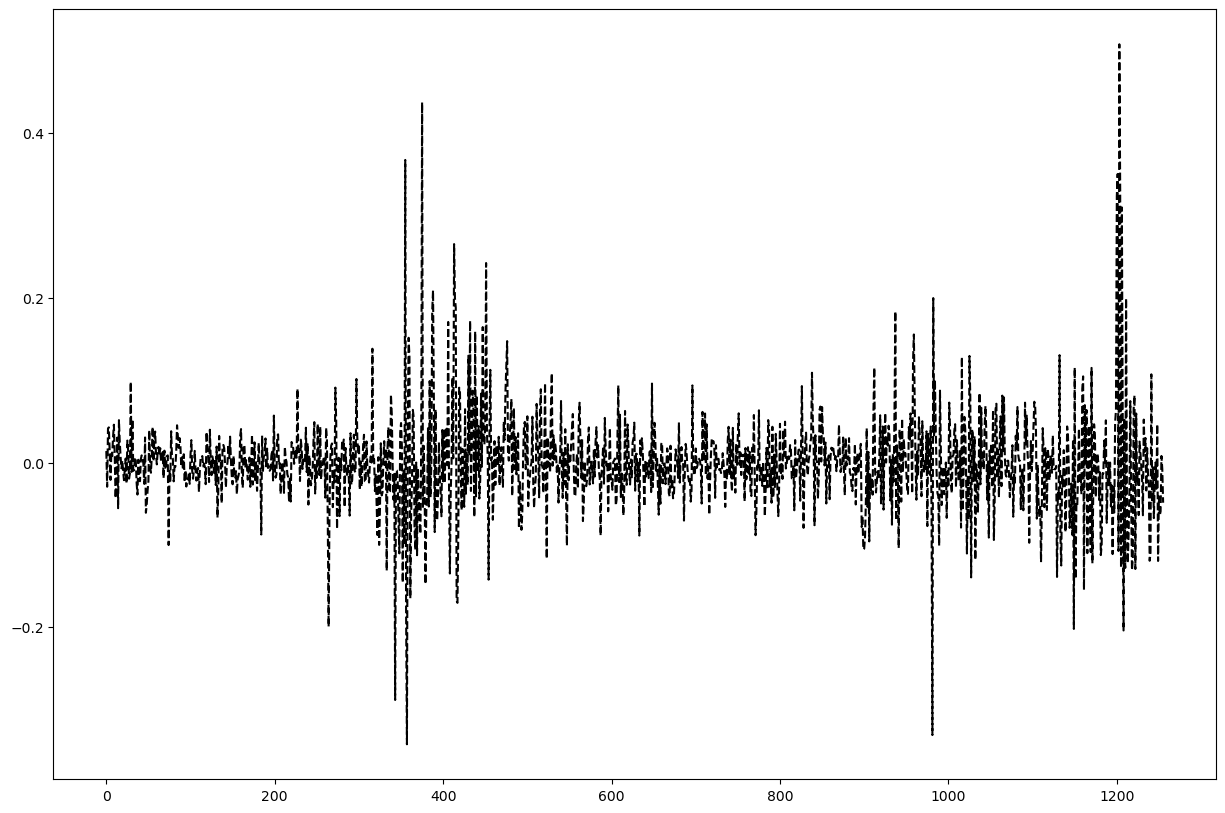

In [7]:
rate_of_return.plot(kind='line',style='k--',figsize=(15,10))
plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

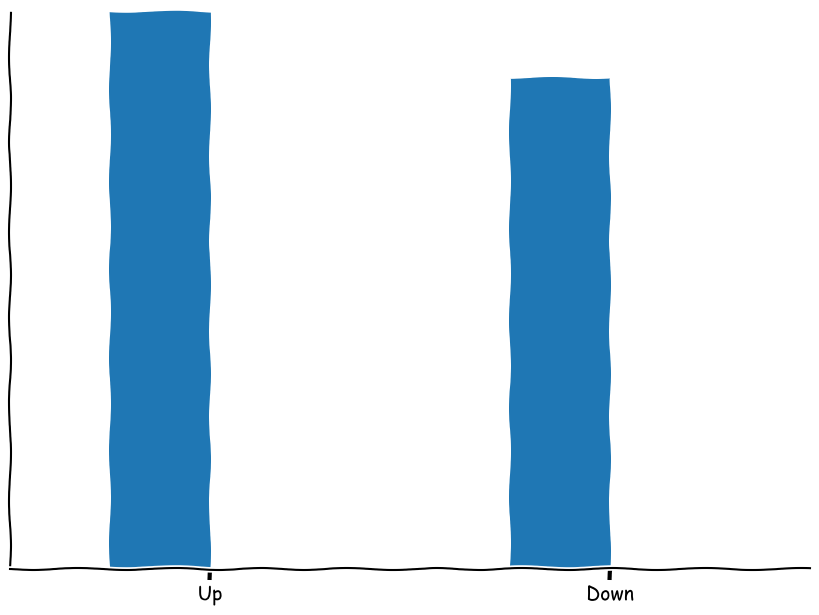

In [12]:
with plt.xkcd():
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([-0.125, 1.0-0.125], [up_and_down_statistic[0], up_and_down_statistic[1]], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, up_and_down_statistic.max()])
    ax.set_xticklabels(['Up', 'Down'])
    plt.yticks([])
plt.show()

In [20]:
from __future__ import division  
from sklearn import tree
from collections import deque

window = 2
    

X = deque()
y = deque()
clf = tree.DecisionTreeClassifier()
prediction = 0
test_num = 0
win_num = 0

current_index = 2

for current_index in range(current_index, len(up_and_down)-1, 1):
 fact = up_and_down[current_index+1]
       
 X.append(list(up_and_down[(current_index-window): current_index]))
 y.append(up_and_down[current_index])
 if len(y) > 100 and len(y) % 50 == 0:
   test_num += 1
   clf.fit(X, y)
   
   prediction = clf.predict([list(up_and_down[(current_index-window+1): current_index+1])])
       
   if prediction[0] == fact:
     win_num += 1
     print(win_num)
     
print("预测准确率为",win_num/test_num)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
预测准确率为 0.6521739130434783
